In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn.ensemble import RandomForestClassifier


#configuracion de hiperparámetros
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Funciones externas
# ==============================================================================
from manny_library import multiple_plot, plot_roc_curve

In [3]:
d = pd.read_csv('final_dataset.csv')
d.head(2)

,ASOCIADOS,EFECTIVO Y EQUIVALENTE AL EFECTIVO,CARTERA DE CRÉDITOS,ACTIVOS MATERIALES,CUENTAS POR PAGAR Y OTRAS,PATRIMONIO,CAPITAL SOCIAL,RESERVAS,GASTOS,DEUDORAS CONTINGENTES,DEUDORAS DE CONTROL,DEUDORAS DE CONTROL POR CONTRA (CR),EXCEDENTES Y/O PÉRDIDAS DEL EJERCICIO
0,437.0,6.007688e+08,1.520753e+09,438279168.0,3.665288e+07,2.483720e+09,1.562958e+09,5.670220e+08,3.280391e+08,32447957.0,2311.66,2311.66,0
1,451.0,1.378691e+09,6.789256e+09,766661.0,1.606668e+08,2.006480e+09,5.754899e+08,1.380294e+09,7.694262e+08,15847179.0,0.00,0.00,1


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5722 entries, 0 to 5721
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ASOCIADOS                               5722 non-null   float64
 1   EFECTIVO Y EQUIVALENTE AL EFECTIVO      5722 non-null   float64
 2   CARTERA DE CRÉDITOS                     5722 non-null   float64
 3   ACTIVOS MATERIALES                      5722 non-null   float64
 4   CUENTAS POR PAGAR Y OTRAS               5722 non-null   float64
 5   PATRIMONIO                              5722 non-null   float64
 6   CAPITAL SOCIAL                          5722 non-null   float64
 7   RESERVAS                                5722 non-null   float64
 8   GASTOS                                  5722 non-null   float64
 9   DEUDORAS CONTINGENTES                   5722 non-null   float64
 10  DEUDORAS DE CONTROL                     5722 non-null   floa

## Visualizacion de datos

#### Variables de entrada

In [5]:
# Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

""
0
1


In [6]:
# Lista de variables numéricas

numCols= d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

d[numCols].head(2)

,ASOCIADOS,EFECTIVO Y EQUIVALENTE AL EFECTIVO,CARTERA DE CRÉDITOS,ACTIVOS MATERIALES,CUENTAS POR PAGAR Y OTRAS,PATRIMONIO,CAPITAL SOCIAL,RESERVAS,GASTOS,DEUDORAS CONTINGENTES,DEUDORAS DE CONTROL,DEUDORAS DE CONTROL POR CONTRA (CR),EXCEDENTES Y/O PÉRDIDAS DEL EJERCICIO
0,437.0,6.007688e+08,1.520753e+09,438279168.0,3.665288e+07,2.483720e+09,1.562958e+09,5.670220e+08,3.280391e+08,32447957.0,2311.66,2311.66,0
1,451.0,1.378691e+09,6.789256e+09,766661.0,1.606668e+08,2.006480e+09,5.754899e+08,1.380294e+09,7.694262e+08,15847179.0,0.00,0.00,1


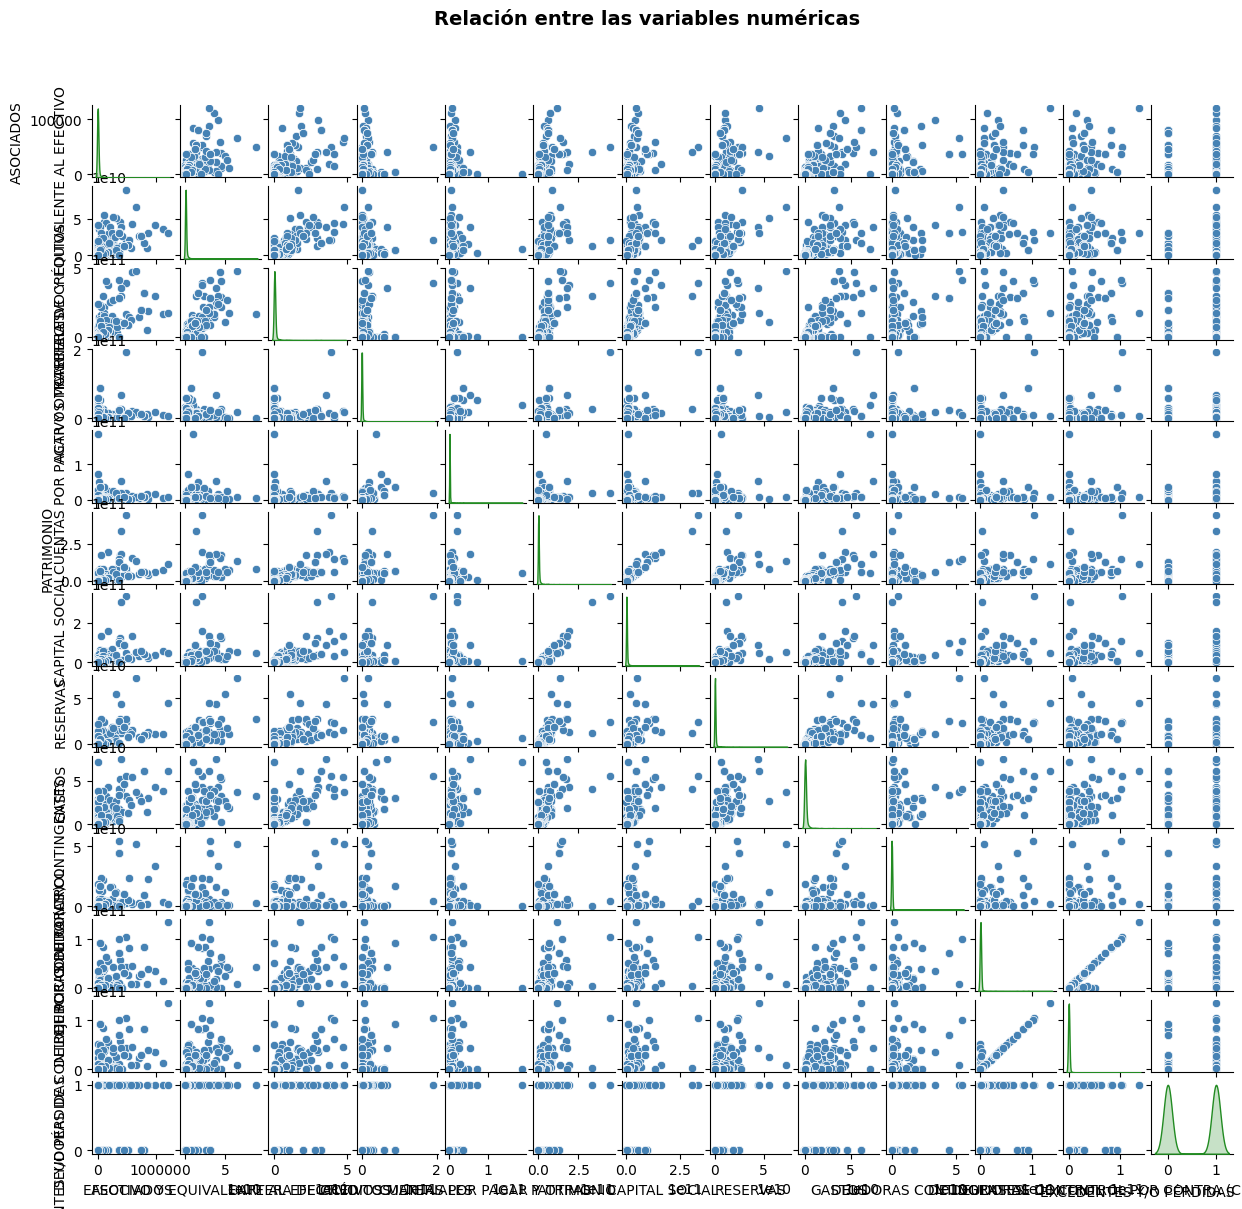

In [ ]:
# Visualización de variables numéricas

multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

In [8]:
# Eliminar la variable de salida de la lista de variable numéricas

numCols.remove('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO')

#### Variable de salida

In [11]:
d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].value_counts()

EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO
0    2861
1    2861
Name: count, dtype: int64

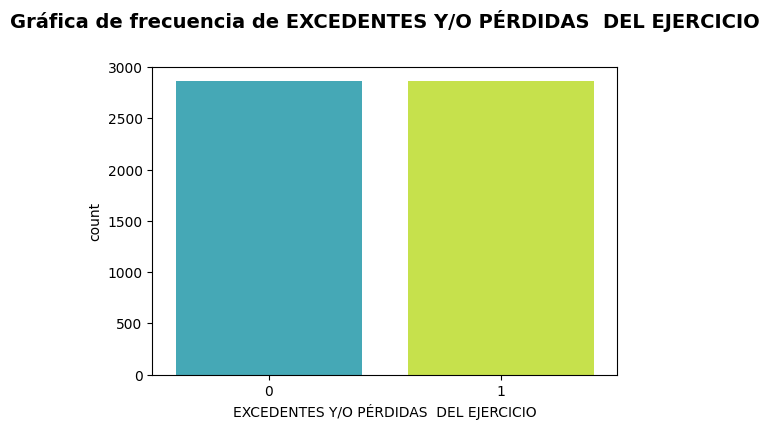

In [12]:
multiple_plot(1, d , None, 'EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO', 'countplot', 'Gráfica de frecuencia de EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO',0)

## Creacion del modelo: Random Forest

In [13]:
# Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d.drop(columns ='EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO')
y = d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO']

# La validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

#### Escalar variables

In [15]:
# Se establecen las variables numéricas a escalar

# Num_vars se le asigna la lista con las variables numericas para posteriormente escalarlas
num_vars = numCols

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])

X_Completo[num_vars].head()

,ASOCIADOS,EFECTIVO Y EQUIVALENTE AL EFECTIVO,CARTERA DE CRÉDITOS,ACTIVOS MATERIALES,CUENTAS POR PAGAR Y OTRAS,PATRIMONIO,CAPITAL SOCIAL,RESERVAS,GASTOS,DEUDORAS CONTINGENTES,DEUDORAS DE CONTROL,DEUDORAS DE CONTROL POR CONTRA (CR)
0,0.003618,0.006694,0.003187,0.002298,0.000197,0.006809,0.004699,0.007787,0.013042,0.000593,1.710339e-08,1.710339e-08
1,0.003735,0.015363,0.014230,0.000004,0.000862,0.005737,0.001730,0.018955,0.018912,0.000290,0.000000e+00,0.000000e+00
2,0.008258,0.051089,0.106181,0.000068,0.002311,0.086971,0.101991,0.024988,0.081014,0.000033,4.763842e-04,3.834447e-01
3,0.005303,0.003775,0.003205,0.001910,0.000123,0.006509,0.004284,0.008494,0.012920,0.000000,0.000000e+00,0.000000e+00
4,0.008474,0.009230,0.013620,0.006619,0.000268,0.020532,0.022945,0.004549,0.021342,0.000809,1.293406e-03,1.293406e-03


### Aplicacion del modelo

##### Grid Search basado en out-of-bag score

In [16]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150, 200, 250],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:

    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )

    modelo.fit(X_Completo, y_Completo)


    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 250} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 250} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 250} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 200} ✓
Model

In [17]:
resultados.head()

,oob_accuracy,criterion,max_depth,max_features,n_estimators
1,0.985145,gini,NaN,5,200
2,0.984970,gini,NaN,5,250
0,0.984621,gini,NaN,5,150
38,0.984446,entropy,NaN,5,250
29,0.984446,gini,20.0,5,250


#### Grid Search basado en validación cruzada

In [18]:
# Definicion del modelo
modelrf = RandomForestClassifier(random_state = 123)


# Grid de hiperparámetros evaluados

grid_param = {'n_estimators': [100, 120],
                          'max_features': [5, 7, 9, 11],
                          'max_depth'   : [3, 5, 10, 15, 20],
                          'criterion'   : ['gini', 'entropy']
                         }


# Definicion de la variable con el número de pliegues
CV = 10

# las metricas sobre las se evaluará el modelo
scoring = 'f1'

# Búsqueda por grid search con validación cruzada
grid_rf = GridSearchCV(
                        estimator  = modelrf,
                        param_grid = grid_param,
                        scoring    = scoring,
                        cv = CV,
                        n_jobs     = - 1,
                        refit      = True,
                        verbose    = 4,
                        return_train_score = True
                       )

grid_rf.fit(X_Completo, y_Completo)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


,estimator,RandomForestC...dom_state=123)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'max_features': [5, 7, ...], 'n_estimators': [100, 120]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,10
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [19]:
# Obtener los resultados del grid search
results_grid_rf = pd.DataFrame(grid_rf.cv_results_)

# Seleccionar las columnas deseadas
columns_grid_rf = ['param_criterion'] + \
                ['param_max_depth'] + \
                ['param_max_features'] + \
                ['param_n_estimators'] + \
                ['mean_test_score', 'std_test_score']  + \
                [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_rf_filtered = results_grid_rf[columns_grid_rf]

# Crear la columna scoreWithStd: f1 / std
results_grid_rf_filtered['scoreWithStd'] = results_grid_rf_filtered.apply(
    lambda row: (row['mean_test_score']) / (row['std_test_score']) if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_rf_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
results_grid_rf_filtered[['param_criterion','param_max_depth','param_max_features','param_n_estimators', 'mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,scoreWithStd
0,gini,3,5,100,0.679594,0.135326,5.021912
1,gini,3,5,120,0.681782,0.134140,5.082616
2,gini,3,7,100,0.675837,0.130938,5.161498
3,gini,3,7,120,0.679422,0.130082,5.223020
4,gini,3,9,100,0.661053,0.133456,4.953329
...,...,...,...,...,...,...,...
75,entropy,20,7,120,0.966434,0.031754,30.434866
76,entropy,20,9,100,0.963684,0.034103,28.257976
77,entropy,20,9,120,0.963624,0.035092,27.460064
78,entropy,20,11,100,0.963378,0.032954,29.233885


In [20]:
# Top 3 de los mejores scores
results_grid_rf_filtered.sort_values(by='scoreWithStd', ascending=False).head(10)[
    ['param_criterion','param_max_depth','param_max_features','param_n_estimators'
     , 'mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,scoreWithStd
74,entropy,20,7,100,0.965966,0.030061,32.133490
36,gini,20,9,100,0.966268,0.031435,30.738988
75,entropy,20,7,120,0.966434,0.031754,30.434866
66,entropy,15,7,100,0.956630,0.032248,29.664861
37,gini,20,9,120,0.966558,0.032897,29.381138
78,entropy,20,11,100,0.963378,0.032954,29.233885
79,entropy,20,11,120,0.964293,0.033305,28.953572
67,entropy,15,7,120,0.957328,0.033322,28.729977
32,gini,20,5,100,0.969824,0.034149,28.399587
26,gini,15,7,100,0.959756,0.033838,28.362870


In [21]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_rf_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_criterion        entropy
param_max_depth             20
param_max_features           7
param_n_estimators         100
mean_test_score       0.965966
std_test_score        0.030061
split0_test_score     0.969479
split1_test_score     0.973166
split2_test_score     0.976744
split3_test_score     0.980392
split4_test_score     0.985816
split5_test_score     0.963768
split6_test_score     0.987611
split7_test_score     0.976744
split8_test_score     0.967509
split9_test_score     0.878431
scoreWithStd          32.13349
Name: 74, dtype: object

In [22]:
results_grid_rf_filtered.loc[indice_max_scoreWithStd]['mean_test_score']

np.float64(0.9659660987219117)

In [23]:
# Usar los mejores parámetros para crear el modelo
modelrf.set_params(criterion = results_grid_rf_filtered.loc[indice_max_scoreWithStd]['param_criterion']
                        , max_depth = results_grid_rf_filtered.loc[indice_max_scoreWithStd]['param_max_depth']
                        , max_features = results_grid_rf_filtered.loc[indice_max_scoreWithStd]['param_max_features']
                        , n_estimators = results_grid_rf_filtered.loc[indice_max_scoreWithStd]['param_n_estimators'])

modelrf.fit(X_Completo, y_Completo)

,n_estimators,np.int64(100)
,criterion,'entropy'
,max_depth,np.int64(20)
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,np.int64(7)
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Importancia de predictores

In [24]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_Completo.columns,
                             'importancia': modelrf.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False).head(10)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,CARTERA DE CRÉDITOS,0.130068
1,EFECTIVO Y EQUIVALENTE AL EFECTIVO,0.124350
8,GASTOS,0.108968
5,PATRIMONIO,0.105105
3,ACTIVOS MATERIALES,0.093468
7,RESERVAS,0.091108
4,CUENTAS POR PAGAR Y OTRAS,0.087334
6,CAPITAL SOCIAL,0.087290
0,ASOCIADOS,0.080773
9,DEUDORAS CONTINGENTES,0.042851


#### Prediccion de probabilidades

In [25]:
# Predicción de probabilidades
# ==============================================================================
predicciones = modelrf.predict_proba(X = X_Completo)
predicciones[:5, :]

array([[1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99]])

In [26]:
# Clasificación empleando la clase de mayor probabilidad
# ==============================================================================
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(5)

,0,1,clasificacion_default_0.5
0,1.00,0.00,0
1,0.01,0.99,1
2,0.00,1.00,1
3,1.00,0.00,0
4,0.01,0.99,1


In [27]:
# Clasificación final empleando un threshold de 0.8 para la clase 1.
# ==============================================================================
df_predicciones['clasificacion_custom_0.8'] = np.where(df_predicciones['1'] > 0.8, 1, 0)
df_predicciones.iloc[4:10, :]

,0,1,clasificacion_default_0.5,clasificacion_custom_0.8
4,0.010000,0.990000,1,1
5,0.000000,1.000000,1,1
6,0.127841,0.872159,1,1
7,0.250000,0.750000,1,0
8,0.010000,0.990000,1,1
9,0.000000,1.000000,1,1


## Creacion del modelo: Regresion Logistica